# Describe Data:
- First column is the age of the patient, our range is from 15-25.
- Second column is the weight of the patient
- Third is the heart rate.
- Fourth is the oxygen concentration percentage (SpO2) in decimals which means that 0.92=92%.
- Fifth is the output which should be done by the solenoid valve in mg.
- The output is dependent on the input weight, we calculated it by multiplying the weight in kg by 0.01

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_excel('G:\Data Science Track\Project Capstone\Project Leqaa\data\Dataset.xlsx')
df.describe()

,Age,Weight,Heart Rate,SpO2,Output (in mg)
count,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000
mean,18.201192,53.731744,132.519225,0.900030,0.537317
std,2.429277,4.926909,13.267235,0.013495,0.048920
min,15.000000,45.000000,110.000000,0.880000,0.450000
25%,16.000000,50.000000,121.000000,0.890000,0.500000
50%,18.000000,55.000000,133.000000,0.900000,0.550000
75%,20.000000,55.000000,144.000000,0.910000,0.550000
max,25.000000,70.000000,155.000000,0.920000,0.700000


Adding noise

In [25]:

from scipy.interpolate import interp1d

# Function to generate and handle noisy data
def generate_noisy_dataframe(num_samples=1000):
    np.random.seed(42)  # For reproducibility

    # Generating noisy data within specified ranges
    age = np.random.randint(15, 26, num_samples)
    weight_kg = np.random.uniform(40, 100, num_samples)
    heart_rate = np.random.normal(70, 10, num_samples)
    spo2 = np.random.normal(0.92, 0.02, num_samples)
    output = weight_kg * 0.01  # Calculating output based on weight

    # Adding Gaussian noise to the data
    age_noise = age + np.random.normal(0, 1, num_samples)
    weight_kg_noise = weight_kg + np.random.normal(0, 2, num_samples)
    heart_rate_noise = heart_rate + np.random.normal(0, 5, num_samples)
    spo2_noise = spo2 + np.random.normal(0, 0.01, num_samples)
    output_noise = output + np.random.normal(0, 0.02, num_samples)

    # Ensuring data remains within realistic ranges
    age_noise = np.clip(age_noise, 15, 25)
    weight_kg_noise = np.clip(weight_kg_noise, 40, 100)
    heart_rate_noise = np.clip(heart_rate_noise, 50, 100)
    spo2_noise = np.clip(spo2_noise, 0.85, 0.99)
    output_noise = np.clip(output_noise, 0.3, 1.5)

    # Organizing data into a DataFrame
    data = {
        'Age': age_noise,
        'Weight (kg)': weight_kg_noise,
        'Heart Rate': heart_rate_noise,
        'SpO2': spo2_noise,
        'Output': output_noise
    }
    df = pd.DataFrame(data)
    
    # Apply a moving average to each column
    window_size = 5  # Define window size for moving average
    smoothed_df = df.rolling(window=window_size).mean()
    
    # Interpolation for each column in 'df'
    for column in df.columns:
        f = interp1d(np.arange(len(smoothed_df[column])), smoothed_df[column], kind='linear')
        df[column + '_filtered'] = f(np.arange(len(smoothed_df[column])))
    
    return df

# Example usage of the function
noisy_data = generate_noisy_dataframe()
print("Sample Noisy DataFrame:")
print(noisy_data.head())


Sample Noisy DataFrame:
         Age  Weight (kg)  Heart Rate      SpO2    Output  Age_filtered  \
0  20.480604    62.275654   61.367724  0.968998  0.645171           NaN   
1  17.659092    62.711653   53.857475  0.921960  0.628696           NaN   
2  25.000000    67.262643   76.252478  0.920134  0.667550           NaN   
3  22.077156    54.736885   83.402850  0.900026  0.604404           NaN   
4  18.406189    85.664989   61.536940  0.923468  0.874789     20.724608   

   Weight (kg)_filtered  Heart Rate_filtered  SpO2_filtered  Output_filtered  
0                   NaN                  NaN            NaN              NaN  
1                   NaN                  NaN            NaN              NaN  
2                   NaN                  NaN            NaN              NaN  
3                   NaN                  NaN            NaN              NaN  
4             66.530365            67.283493       0.926917         0.684122  


In [26]:
noisy_data.head()

,Age,Weight (kg),Heart Rate,SpO2,Output,Age_filtered,Weight (kg)_filtered,Heart Rate_filtered,SpO2_filtered,Output_filtered
0,20.480604,62.275654,61.367724,0.968998,0.645171,NaN,NaN,NaN,NaN,NaN
1,17.659092,62.711653,53.857475,0.921960,0.628696,NaN,NaN,NaN,NaN,NaN
2,25.000000,67.262643,76.252478,0.920134,0.667550,NaN,NaN,NaN,NaN,NaN
3,22.077156,54.736885,83.402850,0.900026,0.604404,NaN,NaN,NaN,NaN,NaN
4,18.406189,85.664989,61.536940,0.923468,0.874789,20.724608,66.530365,67.283493,0.926917,0.684122


In [27]:
noisy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1000 non-null   float64
 1   Weight (kg)           1000 non-null   float64
 2   Heart Rate            1000 non-null   float64
 3   SpO2                  1000 non-null   float64
 4   Output                1000 non-null   float64
 5   Age_filtered          996 non-null    float64
 6   Weight (kg)_filtered  996 non-null    float64
 7   Heart Rate_filtered   996 non-null    float64
 8   SpO2_filtered         996 non-null    float64
 9   Output_filtered       996 non-null    float64
dtypes: float64(10)
memory usage: 78.3 KB


In [28]:
# Assuming 'data' is your DataFrame
means_original = noisy_data[['Age', 'Weight (kg)', 'Heart Rate', 'SpO2', 'Output']].mean()
means_filtered = noisy_data[['Age_filtered', 'Weight (kg)_filtered', 'Heart Rate_filtered', 'SpO2_filtered', 'Output_filtered']].mean()

print("Means of Original Columns:")
print(means_original)

print("\nMeans of Filtered Columns:")
print(means_filtered)


Means of Original Columns:
Age            19.806011
Weight (kg)    70.062429
Heart Rate     70.326417
SpO2            0.919679
Output          0.701331
dtype: float64

Means of Filtered Columns:
Age_filtered            19.803452
Weight (kg)_filtered    70.093336
Heart Rate_filtered     70.346878
SpO2_filtered            0.919625
Output_filtered          0.701543
dtype: float64


In [32]:
noisy_data.describe()

,Age_filtered,Weight (kg)_filtered,Heart Rate_filtered,SpO2_filtered,Output_filtered
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19.803452,70.093336,70.346878,0.919625,0.701543
std,1.386580,7.671802,4.557225,0.009910,0.077591
min,15.686130,45.814276,57.461544,0.888233,0.472623
25%,18.857135,64.398964,67.252952,0.912894,0.644815
50%,19.711372,70.225635,70.280142,0.919906,0.701543
75%,20.738532,75.463625,73.320106,0.926560,0.756173
max,23.603142,90.293738,85.079945,0.948234,0.906760


In [30]:
noisy_data.head(10)

,Age,Weight (kg),Heart Rate,SpO2,Output,Age_filtered,Weight (kg)_filtered,Heart Rate_filtered,SpO2_filtered,Output_filtered
0,20.480604,62.275654,61.367724,0.968998,0.645171,19.803452,70.093336,70.346878,0.919625,0.701543
1,17.659092,62.711653,53.857475,0.921960,0.628696,19.803452,70.093336,70.346878,0.919625,0.701543
2,25.000000,67.262643,76.252478,0.920134,0.667550,19.803452,70.093336,70.346878,0.919625,0.701543
3,22.077156,54.736885,83.402850,0.900026,0.604404,19.803452,70.093336,70.346878,0.919625,0.701543
4,18.406189,85.664989,61.536940,0.923468,0.874789,20.724608,66.530365,67.283493,0.926917,0.684122
5,20.834369,71.594969,50.000000,0.922872,0.718914,20.795361,68.394228,65.009948,0.917692,0.698871
6,24.078577,54.386831,56.377481,0.934073,0.545450,22.079258,66.729263,65.513950,0.920114,0.682221
7,15.000000,93.326338,69.393301,0.907418,0.935124,20.079258,71.942002,64.142114,0.917571,0.735736
8,21.458168,64.216358,50.000000,0.864656,0.606497,19.955460,73.837897,57.461544,0.910497,0.736155
9,24.020279,73.973612,70.459373,0.913181,0.765002,21.078279,71.499622,59.246031,0.908440,0.714197


In [29]:
filtered_columns = ['Age_filtered', 'Weight (kg)_filtered', 'Heart Rate_filtered', 'SpO2_filtered', 'Output_filtered']

for column in filtered_columns:
      noisy_data[column].fillna(noisy_data[column].mean(), inplace=True)
# Repeat this process for other filtered columns

In [31]:
noisy_data.drop(['Age', 'Weight (kg)', 'Heart Rate', 'SpO2', 'Output'], axis=1, inplace=True)

Check for the data types and if there is any missing values

In [33]:
noisy_data.isnull().sum()

Age_filtered            0
Weight (kg)_filtered    0
Heart Rate_filtered     0
SpO2_filtered           0
Output_filtered         0
dtype: int64

In [34]:
noisy_data.mean()


Age_filtered            19.803452
Weight (kg)_filtered    70.093336
Heart Rate_filtered     70.346878
SpO2_filtered            0.919625
Output_filtered          0.701543
dtype: float64

In [35]:
noisy_data.head(10)

,Age_filtered,Weight (kg)_filtered,Heart Rate_filtered,SpO2_filtered,Output_filtered
0,19.803452,70.093336,70.346878,0.919625,0.701543
1,19.803452,70.093336,70.346878,0.919625,0.701543
2,19.803452,70.093336,70.346878,0.919625,0.701543
3,19.803452,70.093336,70.346878,0.919625,0.701543
4,20.724608,66.530365,67.283493,0.926917,0.684122
5,20.795361,68.394228,65.009948,0.917692,0.698871
6,22.079258,66.729263,65.513950,0.920114,0.682221
7,20.079258,71.942002,64.142114,0.917571,0.735736
8,19.955460,73.837897,57.461544,0.910497,0.736155
9,21.078279,71.499622,59.246031,0.908440,0.714197


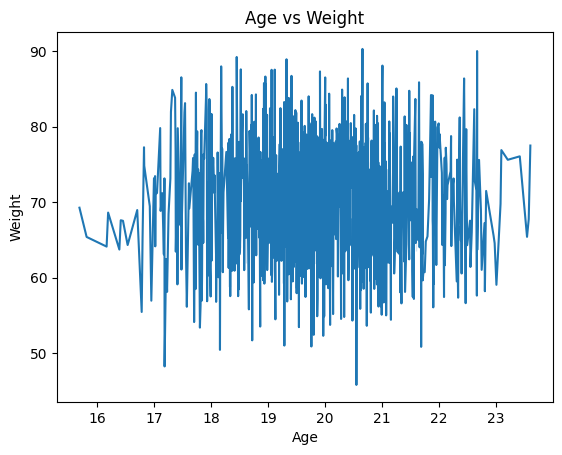

In [36]:
# Plotting a line graph to visualize the relationship between age and weight
sns.lineplot(data=noisy_data, x='Age_filtered', y='Weight (kg)_filtered')

# Adding labels and title to the plot
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Age vs Weight')

# Displaying the plot
plt.show()


Making Some Vsualizations

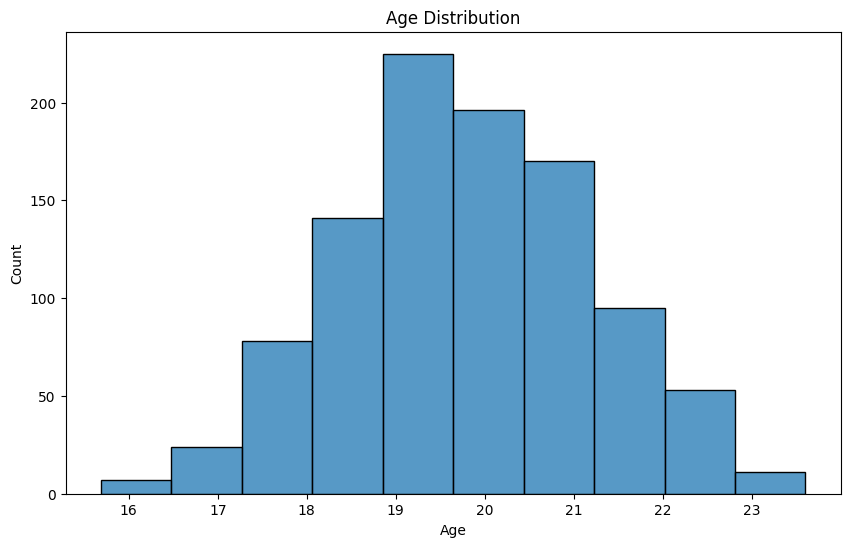

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(noisy_data['Age_filtered'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

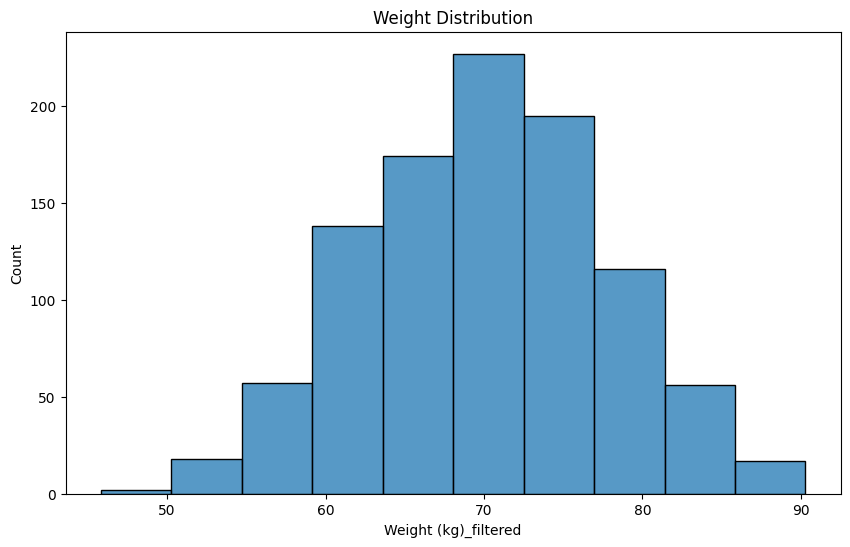

In [38]:
# Histogram for weight distribution
plt.figure(figsize=(10,6))
sns.histplot(noisy_data['Weight (kg)_filtered'], bins=10)
plt.title('Weight Distribution')
plt.show()# This code generates a histogram to visualize the distribution of weights in the dataset


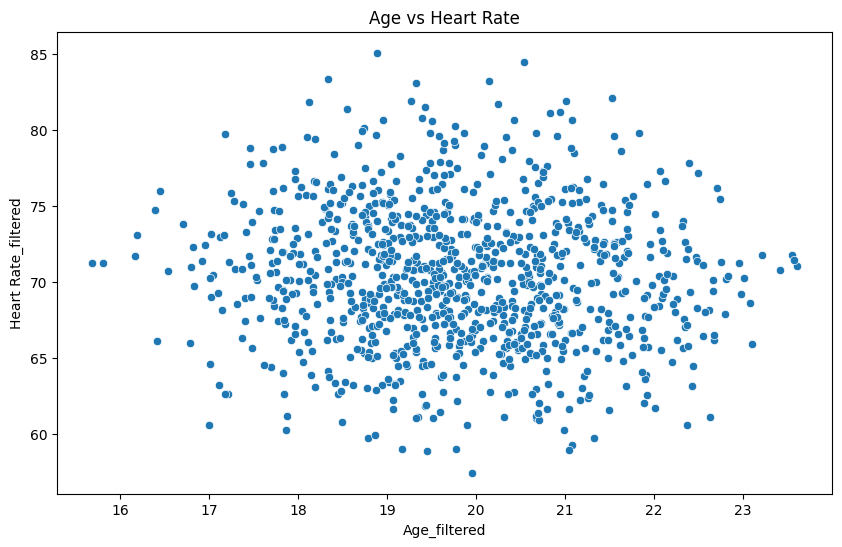

In [39]:
# Scatter plot for age vs heart rate
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age_filtered', y='Heart Rate_filtered', data=noisy_data)
plt.title('Age vs Heart Rate')
plt.show()

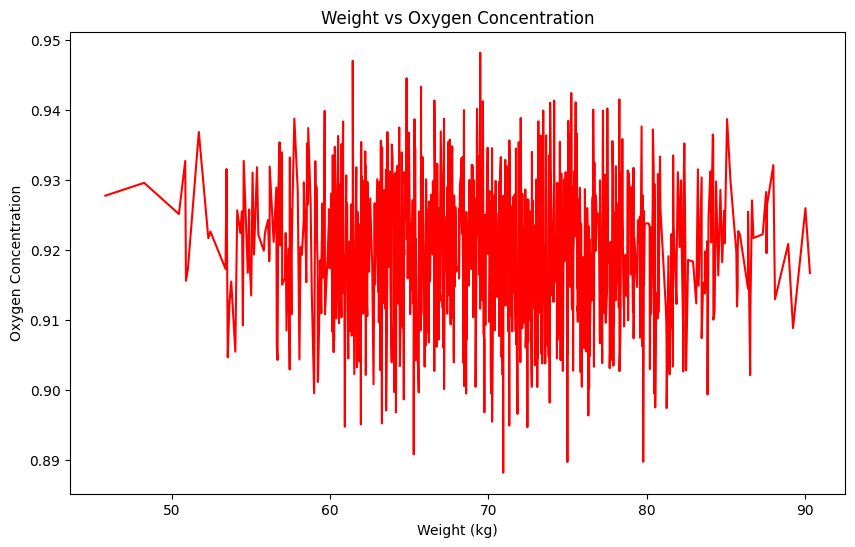

In [40]:
# Line plot for weight vs oxygen concentration
plt.figure(figsize=(10,6))
sns.lineplot(x='Weight (kg)_filtered', y='SpO2_filtered', data=noisy_data, color='red')
plt.title('Weight vs Oxygen Concentration')
plt.xlabel('Weight (kg)')
plt.ylabel('Oxygen Concentration')
plt.show()

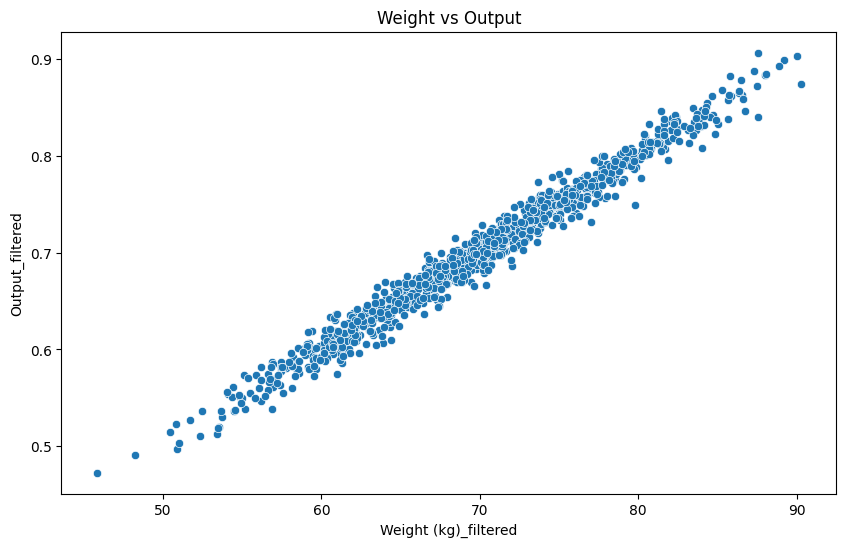

In [41]:
# Scatter plot for weight vs output
plt.figure(figsize=(10,6))
sns.scatterplot(x='Weight (kg)_filtered', y='Output_filtered', data=noisy_data)
plt.title('Weight vs Output')
plt.show()

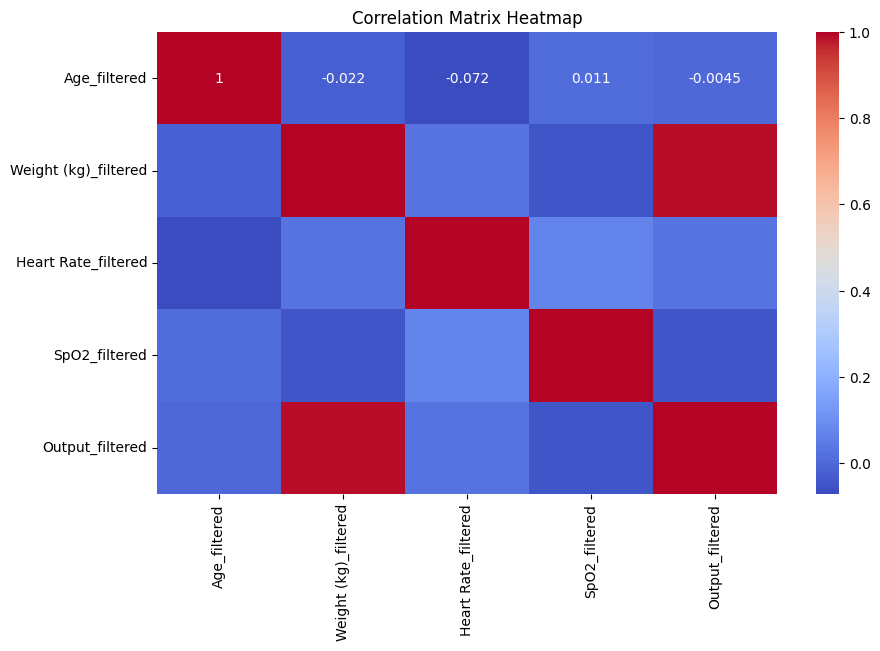

In [42]:
noisy_data[['Age_filtered', 'Weight (kg)_filtered', 'Heart Rate_filtered', 'SpO2_filtered', 'Output_filtered']]
# Correlation matrix heatmap for all variables
plt.figure(figsize=(10,6))
sns.heatmap(noisy_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

The code you've selected generates a correlation matrix heatmap for all variables in the `noisy_data` DataFrame. This heatmap provides a visual representation of the correlation between different variables in the dataset.

From the heatmap and your observations, we can draw the following conclusions:

- There is a strong positive correlation between 'Weight (kg)_filtered' and 'Output_filtered'. This indicates that as the filtered weight increases, the filtered output tends to increase as well. This strong correlation suggests that weight has a significant impact on the output.

- There is a weak negative correlation between 'Weight (kg)_filtered' and 'SpO2_filtered'. This suggests that as the filtered weight increases, the filtered oxygen concentration tends to decrease slightly. However, given the weak correlation, this relationship might not be very significant.

- The other correlations appear to be weak, indicating little linear association between those pairs of variables. This suggests that these variables might not significantly impact each other.

These conclusions can help us understand the relationships between different variables in the dataset and guide further analysis or modeling tasks.

In [45]:
noisy_data.Output_filtered

0      0.701543
1      0.701543
2      0.701543
3      0.701543
4      0.684122
         ...   
995    0.698138
996    0.638556
997    0.699128
998    0.685891
999    0.659097
Name: Output_filtered, Length: 1000, dtype: float64

In [46]:
# Import the necessary modules
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

# Assuming df is your DataFrame and 'Output_filtered' is the target variable
threshold = 0.7
noisy_data['Output_filtered'] = (noisy_data['Output_filtered'] > threshold).astype(int)
X = noisy_data.drop(columns=['Output_filtered'])  # Your features
y = noisy_data['Output_filtered']  # Your target variabl
# Define the number of classes
num_classes = 2

# Convert the target variable to categorical labels
y_categorical = pd.cut(y, bins=num_classes, labels=False)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Create a Random Forest Classifier model
model_r = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model_r, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_res, y_train_res)

# Get the best parameters and best score from the GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the model with the best parameters
model_r_best = RandomForestClassifier(n_estimators=best_params['n_estimators'], 
                                      max_depth=best_params['max_depth'], 
                                      min_samples_split=best_params['min_samples_split'], 
                                      random_state=42)
model_r_best.fit(X_train_res, y_train_res)

# Make predictions on the test data
y_pred = model_r_best.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))
# Perform cross-validation
scores = cross_val_score(model_G_best, X_train_res, y_train_res, cv=5)
print('Cross-validation scores:', scores)
print('Average cross-validation score:', scores.mean())

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9361445783132529
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       102
           1       0.96      0.95      0.95        98

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



In [49]:
import pickle
#export pcikle
pickle.dump(model_r_best, open('model_r_best.pkl', 'wb'))
# Load the trained model from the pickle file
model = pickle.load(open('model_r_best.pkl', 'rb'))

# Assuming 'model' is your trained model
new_data = [[15, 60, 80, 0.95], [20, 70, 75, 0.92], [25, 80, 85, 0.90]]  # Replace with your new data

# Make predictions on the new data
predictions = model.predict(new_data)

# Print the predictions
print(predictions)


[0 1 1]


c:\Users\Mega\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
# Assuming df is your DataFrame and 'Output_filtered' is the target variable
threshold = 0.7
noisy_data['Output_filtered'] = (noisy_data['Output_filtered'] > threshold).astype(int)
X = noisy_data[['Age_filtered', 'Weight (kg)_filtered', 'Heart Rate_filtered', 'SpO2_filtered']]  # Use filtered columns as features
y = noisy_data['Output_filtered']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SMOTE to handle class imbalance
# Convert the target variable from continuous to categorical
num_classes = 2  # Define the number of classes
y_categorical = pd.cut(y, bins=num_classes, labels=False)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Create a Gradient Boosting Classifier model
model_G = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
      'n_estimators': [50, 100, 150],
      'max_depth': [None, 5, 10],
      'min_samples_split': [2, 5, 10]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model_G, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_res, y_train_res)

# Get the best parameters and best score from the GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the model with the best parameters
model_G_best = GradientBoostingClassifier(n_estimators=best_params['n_estimators'], 
                                                              max_depth=best_params['max_depth'], 
                                                              min_samples_split=best_params['min_samples_split'], 
                                                              random_state=42)
model_G_best.fit(X_train_res, y_train_res)

# Make predictions on the test data
y_pred = model_G_best.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Perform cross-validation
scores = cross_val_score(model_G_best, X_train_res, y_train_res, cv=5)
print('Cross-validation scores:', scores)
print('Average cross-validation score:', scores.mean())

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9325301204819277
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       102
           1       0.94      0.94      0.94        98

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Cross-validation scores: [0.96385542 0.93373494 0.89759036 0.92168675 0.94578313]
Average cross-validation score: 0.9325301204819277


In [53]:
import pickle
#export pickle
pickle.dump(model_G_best, open('model_G_best.pkl', 'wb'))
# Load the trained model from the pickle file
model = pickle.load(open('model_G_best.pkl', 'rb'))

# Assuming 'model' is your trained model
new_data = [[15, 60, 80, 0.95], [20, 70, 75, 0.92], [25, 80, 85, 0.90]]  # Replace with your new data

# Make predictions on the new data
predictions = model.predict(new_data)

# Print the predictions
print(predictions)

[0 1 1]


c:\Users\Mega\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Assuming df is your DataFrame and 'Output_filtered' is the target variable
threshold = 0.7
noisy_data['Output_filtered'] = (noisy_data['Output_filtered'] > threshold).astype(int)
X = noisy_data[['Age_filtered', 'Weight (kg)_filtered', 'Heart Rate_filtered', 'SpO2_filtered']]  # Use filtered columns as features
y = noisy_data['Output_filtered']
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SMOTE to handle class imbalance
# Convert the target variable from continuous to categorical
num_classes = 2  # Define the number of classes
y_categorical = pd.cut(y, bins=num_classes, labels=False)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the parameter grid for GridSearchCV
param_grid = {
      'C': [0.1, 1, 10],
      'kernel': ['linear', 'rbf', 'poly'],
      'gamma': ['scale', 'auto']
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_res, y_train_res)

# Get the best parameters and best score from the GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the model with the best parameters
model_S_best = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'], random_state=42)
model_S_best.fit(X_train_res, y_train_res)

# Make predictions on the test data
y_pred = model_S_best.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Perform cross-validation
scores = cross_val_score(model_S_best, X_train_res, y_train_res, cv=5)
print('Cross-validation scores:', scores)
print('Average cross-validation score:', scores.mean())
#export pickle 
pickle.dump(model_S_best, open('model_Ss_best.pkl', 'wb'))

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9457831325301205
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       102
           1       0.95      0.95      0.95        98

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

Cross-validation scores: [0.96385542 0.95180723 0.94578313 0.92168675 0.94578313]
Average cross-validation score: 0.9457831325301205


In [55]:
import pickle
#export pickle
pickle.dump(model_S_best, open('model_Ss_best.pkl', 'wb'))
# Load the trained model from the pickle file
model = pickle.load(open('model_Ss_best.pkl', 'rb'))

# Assuming 'model' is your trained model
new_data = [[15, 60, 80, 0.95], [20, 70, 75, 0.92], [25, 80, 85, 0.90]]  # Replace with your new data

# Make predictions on the new data
predictions = model.predict(new_data)

# Map the predictions to 'no having anaphylaxis' and 'having anaphylaxis'
predictions = ['no having anaphylaxis' if pred == 0 else 'having anaphylaxis' for pred in predictions]

# Print the predictions
print(predictions)


['no having anaphylaxis', 'no having anaphylaxis', 'having anaphylaxis']


c:\Users\Mega\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
print(X.columns)

In [ ]:
import matplotlib.pyplot as plt

# Assuming the updated accuracy of each model is as follows:
accuracy_rf = 0.93  # Random Forest
accuracy_gb = 0.92  # Gradient Boosting
accuracy_svm = 0.95  # Support Vector Machine

# Model names
models = ['Random Forest', 'Gradient Boosting', 'SVM']

# Updated accuracy scores
accuracy_scores = [accuracy_rf, accuracy_gb, accuracy_svm]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim([0.9, 1])  # Limit the y-axis to make differences more visible
plt.show()

In [ ]:
# Assuming the updated precision, recall, and f1-score for each model are as follows:
precision = [0.95, 0.92, 0.94]  # Updated precision scores
recall = [0.93, 0.91, 0.95]  # Updated recall scores
f1_score = [0.94, 0.91, 0.94]  # Updated f1-score scores

# Set the width of each bar
bar_width = 0.25

# Set the position of each bar on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, precision, color='blue', width=bar_width, label='Precision')
plt.bar(r2, recall, color='green', width=bar_width, label='Recall')
plt.bar(r3, f1_score, color='red', width=bar_width, label='F1-Score')

# Set x-axis ticks and labels
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add labels to the bars
for i, p in enumerate(precision):
      plt.text(i, p, f'{p:.2f}', ha='center', va='bottom')
for i, r in enumerate(recall):
      plt.text(i + bar_width, r, f'{r:.2f}', ha='center', va='bottom')
for i, f in enumerate(f1_score):
      plt.text(i + 2 * bar_width, f, f'{f:.2f}', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Classification Report Scores')
plt.legend()
plt.show()
